# Plots by label alignment
Split datasets by label within/not in classifier's labels, plot and compare

In [1]:
import os
import json
import pandas as pd
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from plot import *

In [2]:
def load_ndjson(file):
    output = []
    with open(file, "r") as f:  
        for line in f:
            line = line.strip()  
            if line:  
                try:
                    single_cell = json.loads(line)
                    output.append(single_cell)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from line: {e}")
    return output
def load_json(file):
    with open(file, "r") as f:
        try:
            data = json.load(f)
            return data
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON from file: {e}")
            return None
        
def create_np_array_from_tissue_df(tissue_df):
    """
    Converts the output of the provided loop into a 4 x n NumPy array.

    Args:
        tissue_df: A dictionary where keys are tissue names (t) and values
                   are lists of dictionaries, each containing a 'match_scTab' key.

    Returns:
        A NumPy array of shape (m, n), where m is number of dfs,` n is the number of tissues
    """

    num_tissues = len(tissue_df)
    num_dfs = len(tissue_df[list(tissue_df.keys())[0]])
    result_array = np.zeros((num_dfs, num_tissues))

    for i, (t, df) in enumerate(tissue_df.items()):
        for j in range(num_dfs):
            result_array[j, i] = np.mean(df[j]['match_scTab'])

    return result_array


In [3]:
def split_by_matching(ground_truth_children_dict, model_labels):
    '''
    Find cells that are in the model labels and not in the model labels
    '''
    matched_celltypes = []
    unmatched_celltypes = []
    for cell, children in ground_truth_children_dict.items():
        if set(children).intersection(model_labels):
            matched_celltypes.append(cell)
        else: unmatched_celltypes.append(cell)
    return {'matched':matched_celltypes, 'unmatched':unmatched_celltypes}

def split_dataset(df_list, index_dict, df_col):
    ''' 
    split df_list to separate lists according to df_col and index_dict
    '''
    df_dict = {}
    for k,v in index_dict.items():
        df_dict[k] = [df[df[df_col].isin(v)] for df in df_list]
    return df_dict

In [ ]:
# load cell type label information for sctab, scgpt and ground truth
# get mapped results for scTab labels
sctab_results = load_ndjson('/cristealab/xiwang/DSR1_Preprint/Outputs/Celltype_alignment/scTab_labels/step2_matched.ndjson')
sctab_celltypes_mapped = [result['predicted_label_clean'] for result in sctab_results]
# get mapped results for scgpt labels
scgpt_results = load_ndjson('/cristealab/xiwang/DSR1_Preprint/Outputs/Celltype_alignment/scGPT_labels/step2_matched.ndjson')
scgpt_celltypes_mapped = [result['predicted_label_clean'] for result in scgpt_results]
# get each ground truth celltype's all children
ground_truth_children = load_json('/cristealab/xiwang/DSR1_Preprint/Outputs/Celltype_alignment/groundtruth_labels/results.json')
ground_truth_children_dict = {
    cell["ground_truth_label"]:cell["ground_truth_children"] for cell in ground_truth_children['cells']
} 
for i in range(len(ground_truth_children['cells'])):
    ground_truth_children_dict[ground_truth_children['cells'][i]["ground_truth_label"]]=ground_truth_children['cells'][i]["ground_truth_children"]


# split ground truth cell types label by in/off sctab
sctab_split = split_by_matching(ground_truth_children_dict, sctab_celltypes_mapped)
# by scgpt
scgpt_split = split_by_matching(ground_truth_children_dict, scgpt_celltypes_mapped)

In [ ]:
# load results for 8d and random datasets
file_paths_8d = [
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/scTab/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/scGPT/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_v3/100genes/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_v3/100genes_scGPTClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_v3/100genes_scTabClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_r1/100genes_scGPTClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_r1/100genes_scTabClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_r1/100genes/results.csv'
]
file_paths_random = [
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/scTab/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/scGPT/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_v3/100genes_scTabClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_v3/100genes_scGPTClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_v3/100genes/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_r1/100genes_scTabClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_r1/100genes/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_r1/100genes_scGPTClassifier/results.csv',
]
# cellxgene random sampled data
sctab_8d, scgpt_8d, v3_8d, v3_scgpt_cls_8d, \
    v3_sctab_cls_8d, r1_scgpt_cls_8d, r1_sctab_cls_8d, r1_8d = (pd.read_csv(file) for file in file_paths_8d)
# cellxgene random sampled data
sctab_random, scgpt_random,v3_sctab_cls_random , v3_scgpt_cls_random, \
    v3_random, r1_sctab_cls_random, r1_random, r1_scgpt_cls_random = (pd.read_csv(file) for file in file_paths_random)

In [ ]:
# models whose performance are evaluated and plotted
models = ['scTab', 'R1 (scGPT Classifier)', 'R1 (scTab Classifier)', 'scGPT', 'R1']

In [ ]:
# plot for random dataset
# df list for results in the order of picked models
prediction_df_random = [sctab_random, r1_scgpt_cls_random, r1_sctab_cls_random, scgpt_random, r1_random]
''' 
# add tissue col for tissue split
cells_random = load_ndjson('/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/prompts/prompts_100genes.ndjson')
for df in prediction_df_random:
    df['tissue'] = ''
    for i,c in enumerate(cells_random):
        df['tissue'][i] = c['tissue']
'''
# split ground truth cell types by matching
prediction_df_random_by_sctab = split_dataset(prediction_df_random, sctab_split, 'ground_truth_label')

prediction_df_random_by_scgpt = split_dataset(prediction_df_random, scgpt_split, 'ground_truth_label')

overall_acc = [float(df.iloc[-1,2]) for df in prediction_df_random]
sctab_acc = create_np_array_from_tissue_df(prediction_df_random_by_sctab)
scgpt_acc = create_np_array_from_tissue_df(prediction_df_random_by_scgpt)

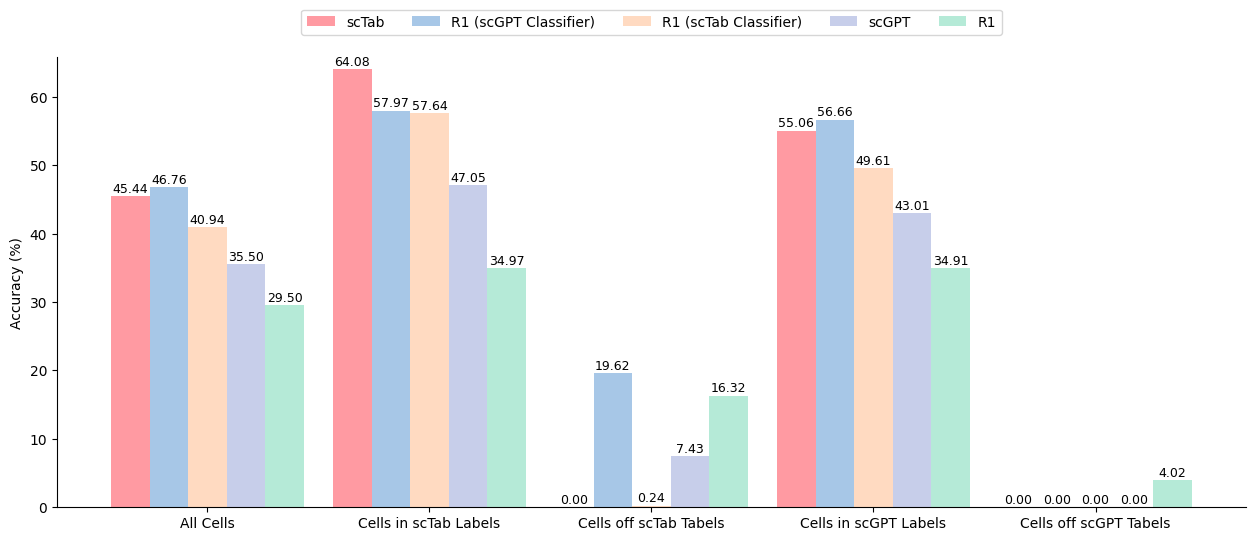

In [ ]:
plotter = MetricPlotter(bar_width = 0.4, annotation_digits=2, 
                        y_lim_lower = 0, 
                        # y_lim_upper=100
                        )
plotter.display_axes_borders = 'xy'
plotter.group_gap = 0.3
plotter.text_margin = 0.001
plotter.ncol_legend = 5
plotter.colors = ['#FF9AA2','#A7C7E7','#FFDAC1','#C7CEEA','#B5EAD7',]
groups = ['All Cells', 'Cells in scTab Labels','Cells off scTab Tabels','Cells in scGPT Labels','Cells off scGPT Tabels']
plotter.group_barplot(groups,models,metrics = np.column_stack((overall_acc, sctab_acc, scgpt_acc)), 
             x_label="", y_label="Accuracy", 
             # title="LLMs' Performance for Clusters"
             )

In [14]:
print(prediction_df_random_by_sctab['unmatched'][0].shape)
prediction_df_random_by_sctab['matched'][0].shape

(2880, 6)


(7091, 6)

In [ ]:
# plots for datasets of balanced tissues
# result dfs by order
prediction_df_8d = [sctab_8d, r1_scgpt_cls_8d, r1_sctab_cls_8d, scgpt_8d, r1_8d]
# add tissue col for tissue split
cells_8d = load_ndjson('/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/prompts/prompts_100genes.ndjson')
for df in prediction_df_8d:
    df['tissue'] = ''
    for i,c in enumerate(cells_8d):
        df['tissue'][i] = c['tissue']

In [ ]:
# split ground truth cell types by matching
# by sctab
prediction_df_8d_by_sctab = split_dataset(prediction_df_8d, sctab_split, 'ground_truth_label')
# by scgpt
prediction_df_8d_by_scgpt = split_dataset(prediction_df_8d, scgpt_split, 'ground_truth_label')

In [8]:
overall_acc = [float(df.iloc[-1,2]) for df in prediction_df_8d]
sctab_acc = create_np_array_from_tissue_df(prediction_df_8d_by_sctab)
scgpt_acc = create_np_array_from_tissue_df(prediction_df_8d_by_scgpt)

In [9]:
np.column_stack((overall_acc, sctab_acc))

array([[0.3207    , 0.6350495 , 0.        ],
       [0.332     , 0.52990099, 0.14094988],
       [0.297     , 0.58811881, 0.        ],
       [0.3308    , 0.59683168, 0.06434668],
       [0.2444    , 0.35207921, 0.14576494]])

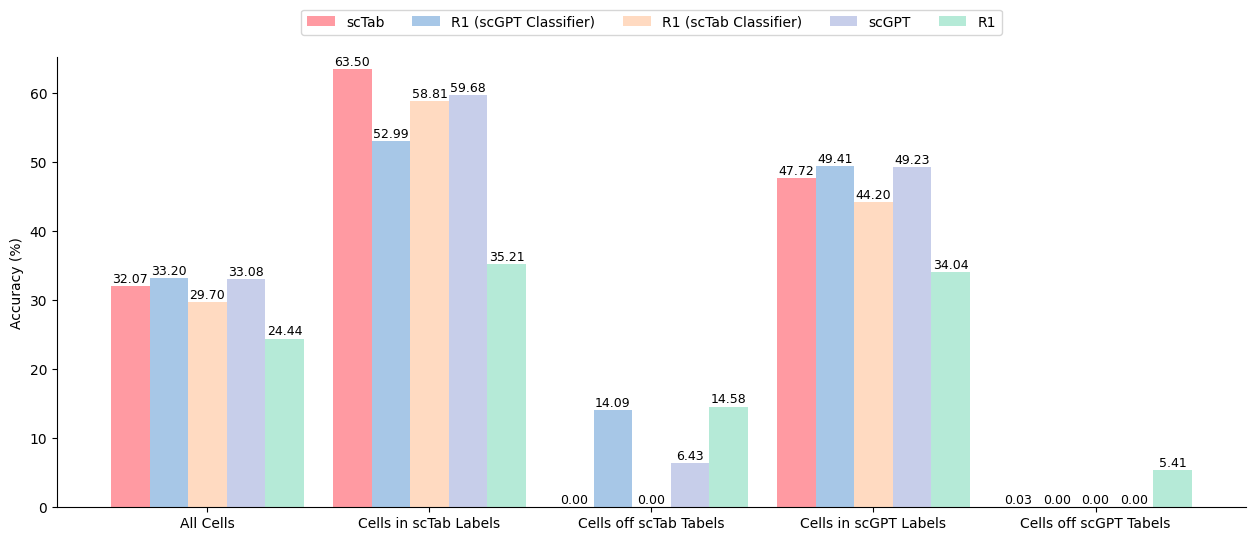

In [10]:
plotter = MetricPlotter(bar_width = 0.4, annotation_digits=2, 
                        y_lim_lower = 0, 
                        # y_lim_upper=100
                        )
plotter.display_axes_borders = 'xy'
plotter.group_gap = 0.3
plotter.text_margin = 0.001
plotter.ncol_legend = 5
plotter.colors = ['#FF9AA2','#A7C7E7','#FFDAC1','#C7CEEA','#B5EAD7',]
groups = ['All Cells', 'Cells in scTab Labels','Cells off scTab Tabels','Cells in scGPT Labels','Cells off scGPT Tabels']
plotter.group_barplot(groups,models,metrics = np.column_stack((overall_acc, sctab_acc, scgpt_acc)), 
             x_label="", y_label="Accuracy", 
             # title="LLMs' Performance for Clusters"
             )

In [ ]:
# split by tissues in all cells
tissues = set([cell['tissue'] for cell in cells_8d])
tissue_index = {t:[t] for t in tissues}
prediction_df_8d_by_tissue = split_dataset(prediction_df_8d, tissue_index, 'tissue')
tissue_acc = create_np_array_from_tissue_df(prediction_df_8d_by_tissue)

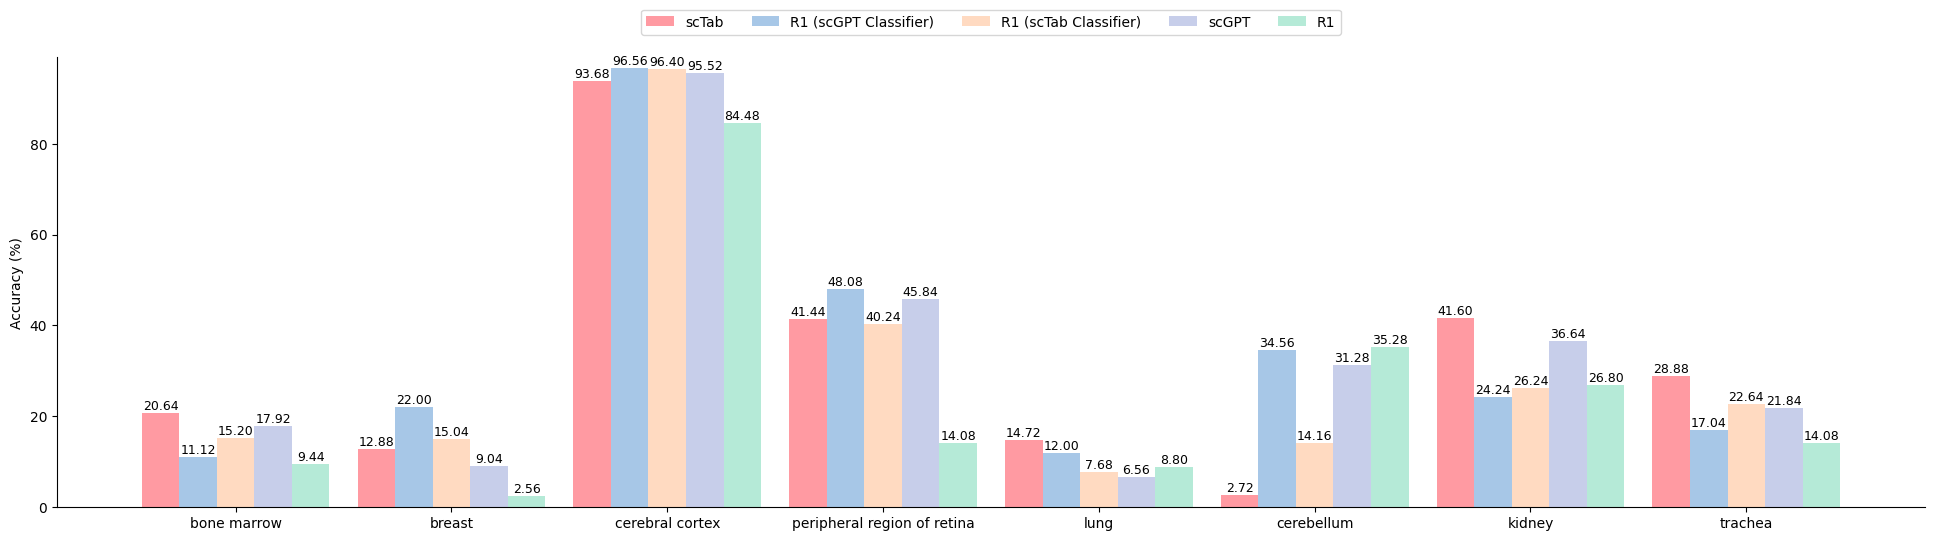

In [ ]:

plotter.group_barplot(tissue_index.keys(),models,metrics = tissue_acc, 
             x_label="", y_label="Accuracy"
             )

In [46]:
def plot_heatmap(data,
                            row_names=None,
                            col_names=None,
                            title="Heatmap",
                            xlabel="Columns",
                            ylabel="Rows",
                            cmap="viridis",
                            annot=True,
                            fmt=".2f",
                            linewidths=0.5,
                            linecolor='lightgray',
                            cbar=False,
                            figsize=(10, 8),
                            xtick_rotation=45,
                            ax=None,
                            vmin=None,  # Added vmin
                            vmax=None,  # Added vmax
                            **kwargs):
    """
    Generates an aesthetically attractive heatmap for m x n data.

    Args:
        data (array-like or pd.DataFrame): The m x n matrix data to plot.
        row_names (list-like, optional): Names for the rows (y-axis).
            Ignored if 'data' is a pandas DataFrame. Defaults to None.
        col_names (list-like, optional): Names for the columns (x-axis).
            Ignored if 'data' is a pandas DataFrame. Defaults to None.
        title (str, optional): Title for the plot. Defaults to "Heatmap".
        xlabel (str, optional): Label for the x-axis. Defaults to "Columns".
        ylabel (str, optional): Label for the y-axis. Defaults to "Rows".
        cmap (str or Colormap, optional): The colormap to use.
            Examples: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' (sequential)
                      'coolwarm', 'bwr', 'RdBu_r' (diverging)
                      'YlGnBu', 'Blues', 'BuPu', 'Greens' (sequential multi-hue)
            Defaults to "viridis".
        annot (bool or array-like, optional): If True, write the data value in each cell.
            If an array-like object matching 'data' shape, plot those values instead.
            Defaults to True.
        fmt (str, optional): String formatting code to use when annot is True.
            Defaults to ".2f".
        linewidths (float, optional): Width of the lines that will divide each cell.
            Defaults to 0.5.
        linecolor (str, optional): Color of the lines that will divide each cell.
            Defaults to 'lightgray'.
        cbar (bool, optional): Whether to draw a color bar. Defaults to True.
        figsize (tuple, optional): Width, height in inches. Defaults to (10, 8).
            Adjust based on the matrix size for better readability.
        xtick_rotation (int or float, optional): Rotation angle for x-axis tick labels.
            Defaults to 45. Set to 0 or None for no rotation.
        ax (matplotlib.axes.Axes, optional): An existing Axes object to plot on.
            If None, a new figure and axes are created. Defaults to None.
        vmin (float, optional): The minimum value anchoring the colormap.
            Defaults to None.
        vmax (float, optional): The maximum value anchoring the colormap.
            Defaults to None.
        **kwargs: Additional keyword arguments passed directly to seaborn.heatmap().

    Returns:
        matplotlib.axes.Axes: The Axes object with the heatmap.
    """
    if isinstance(data, pd.DataFrame):
        plot_data = data
        _row_names = data.index.tolist() if row_names is None else row_names
        _col_names = data.columns.tolist() if col_names is None else col_names
    else:
        plot_data = pd.DataFrame(data, index=row_names, columns=col_names)
        _row_names = plot_data.index.tolist()
        _col_names = plot_data.columns.tolist()

    if ax is None:
        fig, current_ax = plt.subplots(figsize=figsize)
    else:
        current_ax = ax
        fig = current_ax.figure

    sns.heatmap(plot_data,
                annot=annot,
                fmt=fmt,
                cmap=cmap,
                linewidths=linewidths,
                linecolor=linecolor,
                cbar=cbar,
                ax=current_ax,
                xticklabels=True,
                yticklabels=True,
                vmin=vmin,  # Use provided vmin
                vmax=vmax,  # Use provided vmax
                **kwargs)

    current_ax.set_title(title, fontsize=14, fontweight='bold')
    current_ax.set_xlabel(xlabel, fontsize=12)
    current_ax.set_ylabel(ylabel, fontsize=12)

    current_ax.set_xticks(np.arange(len(_col_names)) + 0.5)
    current_ax.set_yticks(np.arange(len(_row_names)) + 0.5)
    current_ax.set_xticklabels(_col_names)
    current_ax.set_yticklabels(_row_names)

    if xtick_rotation is not None:
         plt.setp(current_ax.get_xticklabels(), rotation=xtick_rotation, ha="right",
                  rotation_mode="anchor")

    plt.setp(current_ax.get_yticklabels(), rotation=0)

    if ax is None:
         try:
             fig.tight_layout()
         except ValueError:
             print("Warning: tight_layout failed. Plot elements might overlap.")

    return current_ax

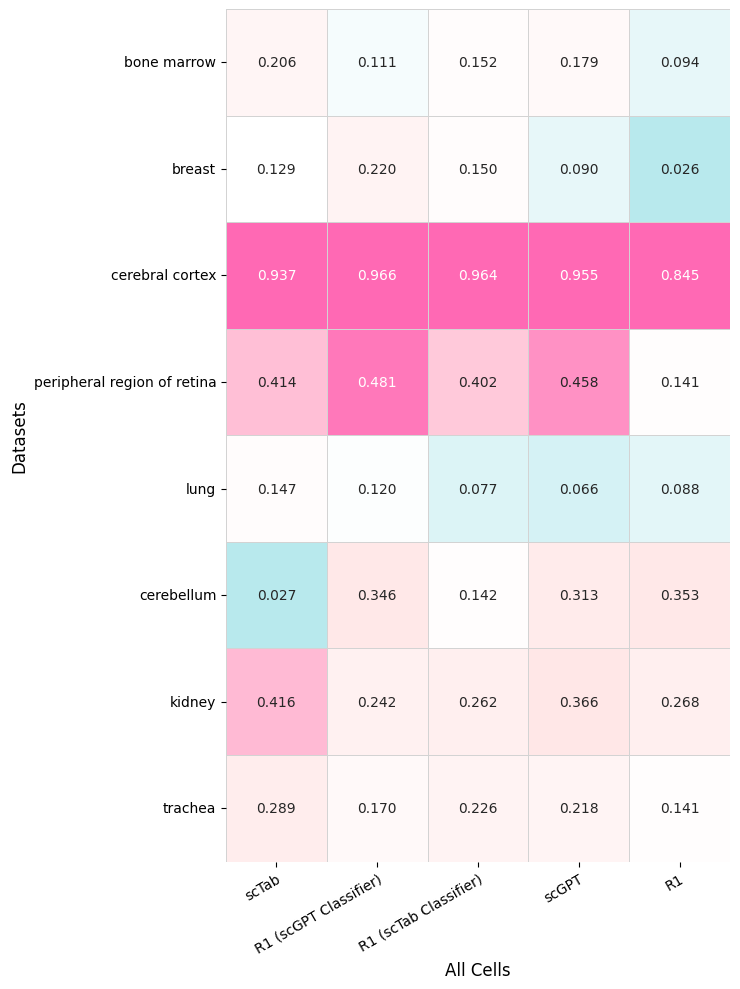

In [ ]:
from matplotlib.colors import LinearSegmentedColormap # Import this
# Use hex codes or color names recognized by matplotlib
colors = ["#A6E3E9","#FFFFFF",'#FFF0F0','#FFE6E6',"#FF69B4"]
n_bins = 100 # Number of discrete color steps
cmap_name = "YlOrPi_custom"
my_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

ax1 = plot_heatmap(
    tissue_acc.T,
    row_names=tissue_index.keys(),
    col_names=models,
    title="",
    xlabel="All Cells",
    ylabel="Datasets",
    cmap=my_cmap,      # Diverging colormap
    fmt=".3f",            # One decimal place
    figsize=(7.5, 10),       # Custom size
    xtick_rotation=30,
    vmin=0,
    vmax=0.5
)
plt.show()

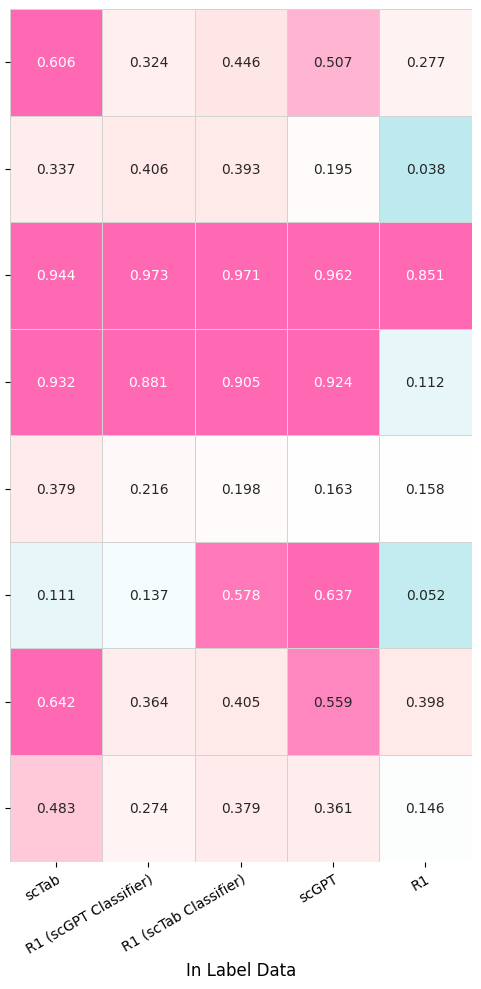

In [ ]:
# split by tissues in scTab labels
prediction_df_8d_in_sctab_by_tissue = split_dataset(prediction_df_8d_by_sctab['matched'], tissue_index, 'tissue')
ax1 = plot_heatmap(
    create_np_array_from_tissue_df(prediction_df_8d_in_sctab_by_tissue).T,
    row_names=['']*8,
    col_names=models,
    title="",
    xlabel="In Label Data",
    ylabel="",
    cmap=my_cmap,      # Diverging colormap
    fmt=".3f",            # One decimal place
    figsize=(5, 10),       # Custom size
    xtick_rotation=30,
    vmin=0,
    vmax=0.6
)
plt.show()

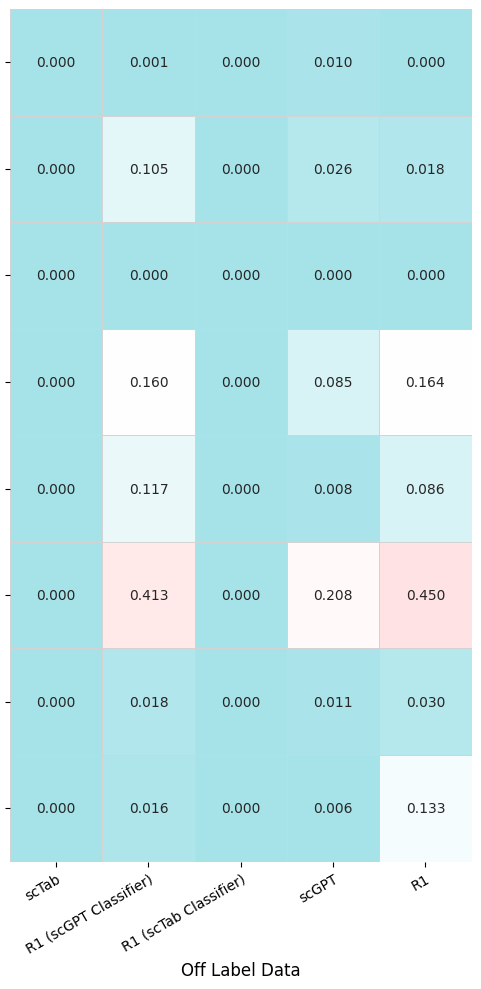

In [ ]:
# split by tissues off scTab labels
prediction_df_8d_off_sctab_by_tissue = split_dataset(prediction_df_8d_by_sctab['unmatched'], tissue_index, 'tissue')
ax1 = plot_heatmap(
    create_np_array_from_tissue_df(prediction_df_8d_off_sctab_by_tissue).T,
    row_names=['']*8,
    col_names=models,
    title="",
    xlabel="Off Label Data",
    ylabel="",
    cmap=my_cmap,      # Diverging colormap
    fmt=".3f",            # One decimal place
    figsize=(5, 10),       # Custom size
    xtick_rotation=30,
    vmin=0,
    vmax=0.6
)
plt.show()